In [167]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/allgender_allsubject/student_scores_clean.csv')

In [168]:
behavior_cols = ['part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours']

career_cols = [col for col in df.columns if 'career_' in col]

df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_Accountant,career_Artist,career_Banker,career_Business Owner,career_Construction Engineer,...,career_Government Officer,career_Lawyer,career_Real Estate Developer,career_Scientist,career_Software Engineer,career_Stock Investor,career_Teacher,career_Unknown,career_Writer,average_score
0,1,0,3,0,27,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,82.000000
1,0,0,2,0,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91.428571
2,0,0,9,1,13,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,86.428571
3,0,0,5,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,78.714286
4,1,0,5,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,74.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1,0,1,0,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76.428571
1878,1,0,2,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,79.714286
1879,1,0,2,0,20,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,76.285714
1880,0,0,5,0,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,82.571429


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[behavior_cols + career_cols]

y = df['average_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# XGBoost

In [170]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=42)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [171]:
y_pred = model.predict(X_test)

accuracy = np.mean((np.abs(y_pred - y_test)) <= 5)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')
print(f'MSE: {mse:.2f}')
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f'R-squared: {r2:.2f}')


accuracy: 0.70
MSE: 24.23
RMSE: 4.92
MAE: 3.84
R-squared: 0.23


career_Teacher: 0.0062
career_Artist: 0.0098
part_time_job: 0.0104
career_Stock Investor: 0.0110
career_Game Developer: 0.0111
absence_days: 0.0120
career_Designer: 0.0124
career_Construction Engineer: 0.0134
career_Banker: 0.0147
extracurricular_activities: 0.0158
career_Software Engineer: 0.0163
career_Real Estate Developer: 0.0169
career_Government Officer: 0.0170
career_Writer: 0.0233
weekly_self_study_hours: 0.0369
career_Unknown: 0.0386
career_Accountant: 0.0424
career_Lawyer: 0.0457
career_Scientist: 0.0690
career_Doctor: 0.1318
career_Business Owner: 0.4453


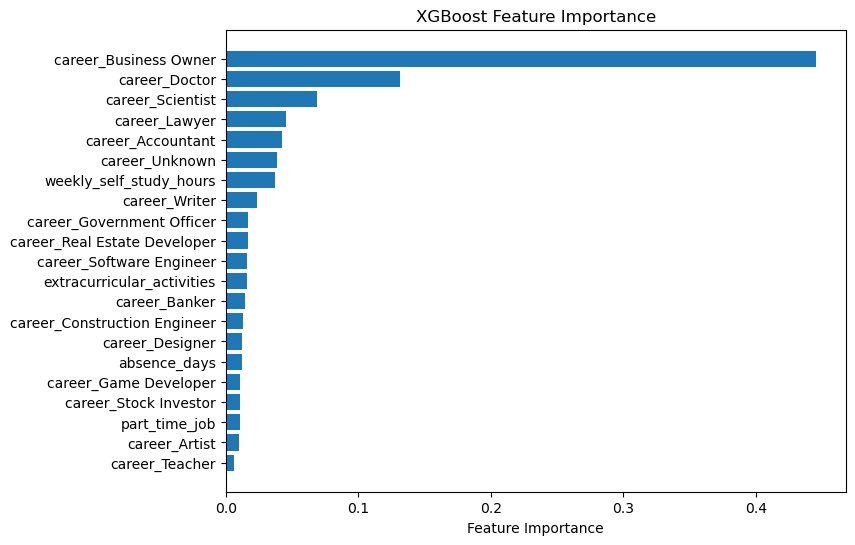

In [172]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X_train.columns

xgb_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
xgb_df = xgb_df.sort_values(by='importance', ascending=True)

for _, row in xgb_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

plt.figure(figsize=(8, 6))
plt.barh(xgb_df['feature'], xgb_df['importance'])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()


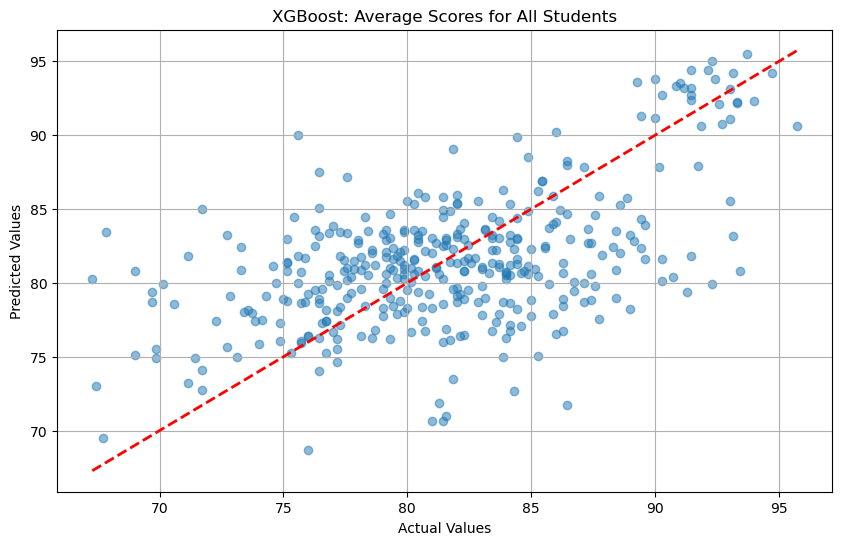

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'XGBoost: Average Scores for All Students')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Random Forest

In [174]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [175]:
y_pred = model.predict(X_test)

accuracy = np.mean((np.abs(y_pred - y_test)) <= 5)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

accuracy: 0.72
MSE: 21.57
RMSE: 4.64
MAE: 3.55
R-squared: 0.32


career_Game Developer: 0.0035
career_Artist: 0.0038
career_Government Officer: 0.0047
career_Teacher: 0.0051
career_Real Estate Developer: 0.0053
career_Writer: 0.0060
career_Construction Engineer: 0.0068
career_Designer: 0.0077
career_Scientist: 0.0087
career_Stock Investor: 0.0087
career_Software Engineer: 0.0091
career_Banker: 0.0094
career_Lawyer: 0.0103
career_Accountant: 0.0153
career_Unknown: 0.0253
career_Doctor: 0.0260
part_time_job: 0.0308
extracurricular_activities: 0.0398
career_Business Owner: 0.1171
absence_days: 0.1683
weekly_self_study_hours: 0.4884


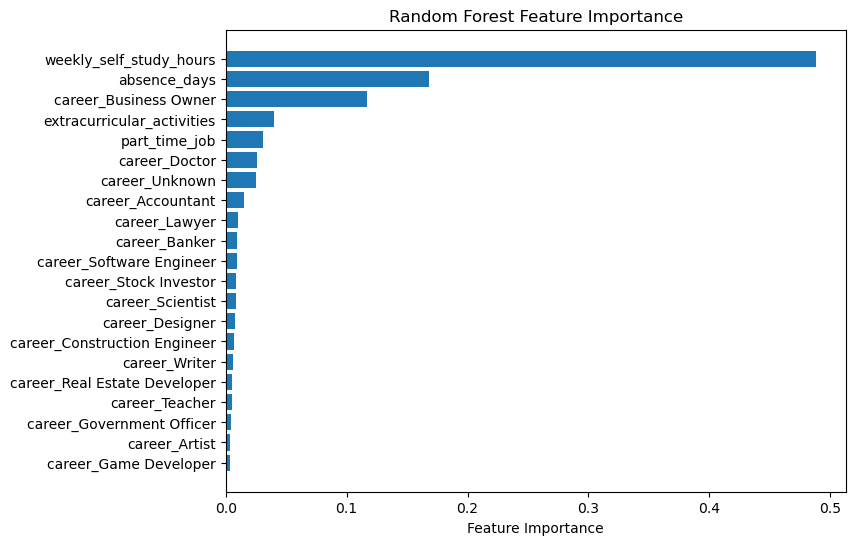

In [176]:
importances = model.feature_importances_
feature_names = X_train.columns

rf_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
rf_df = rf_df.sort_values(by='importance', ascending=True)

for _, row in rf_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

plt.figure(figsize=(8, 6))
plt.barh(rf_df['feature'], rf_df['importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


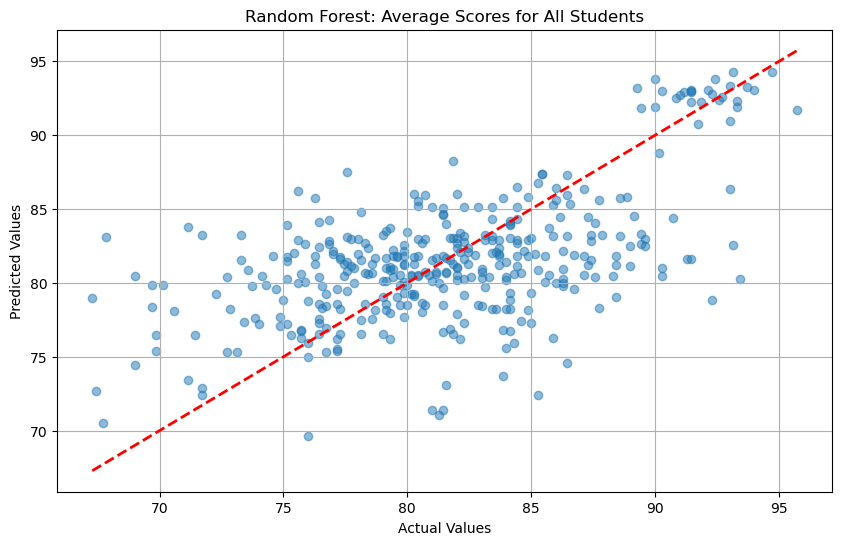

In [177]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Random Forest: Average Scores for All Students')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Linear Regression

In [178]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred = model.predict(X_test)

accuracy = np.mean((np.abs(y_pred - y_test)) <= 5)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

accuracy: 0.72
MSE: 20.09
RMSE: 4.48
MAE: 3.56
R-squared: 0.36


career_Business Owner: -4.0106
career_Accountant: -3.1306
career_Unknown: -2.5157
career_Teacher: -1.1309
career_Software Engineer: -0.7343
career_Banker: -0.6107
career_Stock Investor: -0.5828
career_Real Estate Developer: -0.5635
part_time_job: -0.4449
career_Government Officer: -0.2021
extracurricular_activities: -0.0923
absence_days: -0.0232
weekly_self_study_hours: 0.1294
career_Designer: 0.2738
career_Artist: 0.6977
career_Lawyer: 0.7526
career_Construction Engineer: 0.7880
career_Writer: 1.3511
career_Game Developer: 1.7606
career_Scientist: 2.6453
career_Doctor: 5.2123


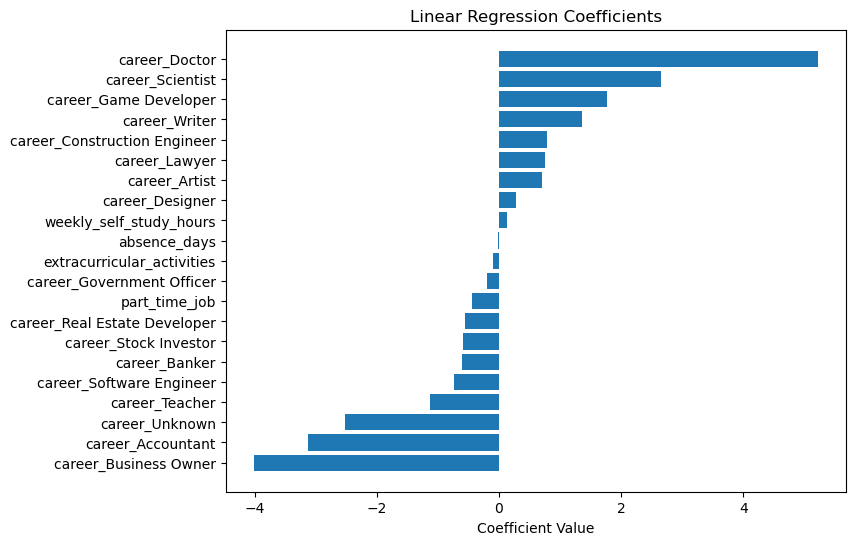

In [180]:
coefficients = model.coef_
feature_names = X_train.columns

lr_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
lr_df = lr_df.sort_values(by='coefficient', ascending=True)

for _, row in lr_df.iterrows():
    print(f"{row['feature']}: {row['coefficient']:.4f}")

plt.figure(figsize=(8, 6))
plt.barh(lr_df['feature'], lr_df['coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.show()
